<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Práctica 2: Greedy</h2>
</center>
</p>
</div>

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un minimum spanning tree de ese grafo es un subgrafo que tiene que ser un árbol y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso proporcional entre ellos, que es un número representativo de algún objeto, distancia, etc.; y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o un árbol expandido mínimo es un árbol recubridor que pesa menos o igual que otros árboles recubridores. Todo grafo tiene un bosque recubridor mínimo.
  </p>
  <p>
      En esta práctica se plantea la implementación del algoritmo de Prim para encontrar el arbol de expansión mínima en el metro de Londres.
  </p>
  </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: El grafo del metro de londres.</li>
</ul>
<br>
<h3>OUTPUT</h3>

<ul>
<li>
__tree__: Objeto de tipo `Graph` que contenga el MST del grafo inical.
</li>
<ul>

</p>
</div>


In [1]:
from graph import Graph
from util import get_subway_graph, draw_subway_graph
# from test import test

G, lines = get_subway_graph('csv', Graph)
G.edge[1][52]

{'color': '0d6928',
 'distance': 0.014782760229403606,
 'line': 4,
 'name': 'District Line',
 'stripe': 'NULL'}

In [2]:
G.node[52]

{'display_name': 'Chiswick<br />Park',
 'latitude': 51.4946,
 'longitude': -0.2678,
 'name': 'Chiswick Park',
 'rail': '0',
 'total_lines': 1,
 'zone': 3.0}

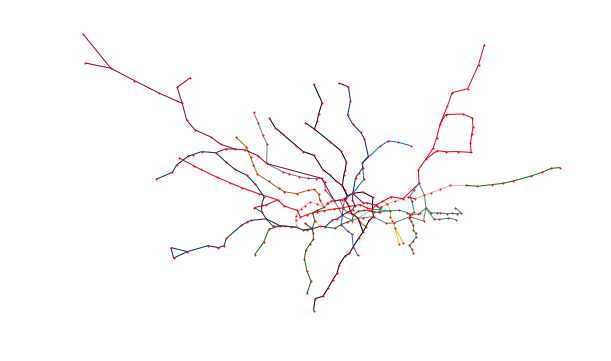

In [3]:
draw_subway_graph(G, lines, figsize=(10,6))

In [4]:
from graph import Graph
G2 = Graph()
G2.add_nodes_from(['A','C','E','B','D','F'])

G2.add_edge('A','C',{'color': 'rojo', 'distance': 6,'line': 1, 'name': 'L5', 'stripe': 'NULL'})
G2.add_edge('A','D',{'color': 'rojo', 'distance': 4,'line': 1, 'name': 'L5', 'stripe': 'NULL'})
G2.add_edge('A','B',{'color': 'rojo', 'distance': 5,'line': 1, 'name': 'L5', 'stripe': 'NULL'})

G2.add_edge('C','B',{'color': 'rojo', 'distance': 1,'line': 1, 'name': 'L5', 'stripe': 'NULL'})
G2.add_edge('C','D',{'color': 'rojo', 'distance': 2,'line': 1, 'name': 'L5', 'stripe': 'NULL'})
G2.add_edge('C','E',{'color': 'rojo', 'distance': 5,'line': 1, 'name': 'L5', 'stripe': 'NULL'})
G2.add_edge('C','F',{'color': 'rojo', 'distance': 3,'line': 1, 'name': 'L5', 'stripe': 'NULL'})

G2.add_edge('E','F',{'color': 'rojo', 'distance': 4,'line': 1, 'name': 'L5', 'stripe': 'NULL'})

G2.add_edge('B','D',{'color': 'rojo', 'distance': 2,'line': 1, 'name': 'L5', 'stripe': 'NULL'})

G2.add_edge('D','F',{'color': 'rojo', 'distance': 4,'line': 1, 'name': 'L5', 'stripe': 'NULL'})





In [5]:
from graph import Graph
#graf senzill
G3 = Graph()
G3.add_node('A',attr_dict = {'prev':None})
G3.add_node('B',attr_dict = {'prev':None})
G3.add_node('C',attr_dict = {'prev':None})
G3.add_node('D',attr_dict = {'prev':None})
G3.add_node('E',attr_dict = {'prev':None})
G3.add_node('F',attr_dict = {'prev':None})
G3.add_node('Z',attr_dict = {'prev':None})

G3.add_edge('A','B',attr_dict = {'distance':5})
G3.add_edge('A','C',attr_dict = {'distance':6})
G3.add_edge('A','D',attr_dict = {'distance':4})
G3.add_edge('B','C',attr_dict = {'distance':1})
G3.add_edge('B','D',attr_dict = {'distance':2})
G3.add_edge('C','D',attr_dict = {'distance':2})
G3.add_edge('C','E',attr_dict = {'distance':5})
G3.add_edge('C','F',attr_dict = {'distance':3})
G3.add_edge('D','F',attr_dict = {'distance':4})
G3.add_edge('E','F',attr_dict = {'distance':4})
G3.add_edge('A','Z',attr_dict = {'distance':8})

[(11, 212), (11, 163), (11, 249), (163, 82), (212, 192), (49, 151), (49, 87), (87, 285), (87, 255), (197, 151), (82, 193), (193, 83), (193, 278), (193, 18), (84, 29), (84, 136), (84, 148), (148, 279), (279, 233), (113, 298), (113, 246), (246, 281), (298, 137), (114, 140), (140, 237), (137, 206), (206, 143), (237, 185), (143, 159), (159, 278), (185, 281), (192, 277), (192, 28), (13, 167), (13, 157), (13, 250), (156, 3), (156, 167), (16, 173), (16, 91), (91, 109), (173, 98), (24, 164), (164, 244), (164, 33), (28, 162), (28, 107), (37, 301), (37, 158), (158, 68), (301, 241), (301, 215), (48, 126), (126, 223), (51, 103), (103, 109), (68, 256), (256, 88), (72, 73), (72, 286), (286, 181), (76, 181), (181, 112), (296, 226), (98, 211), (211, 275), (105, 196), (105, 177), (177, 239), (196, 112), (259, 151), (259, 102), (127, 186), (127, 226), (186, 18), (186, 208), (186, 122), (149, 208), (153, 247), (153, 154), (154, 230), (154, 275), (247, 204), (247, 289), (230, 241), (239, 221), (221, 294),

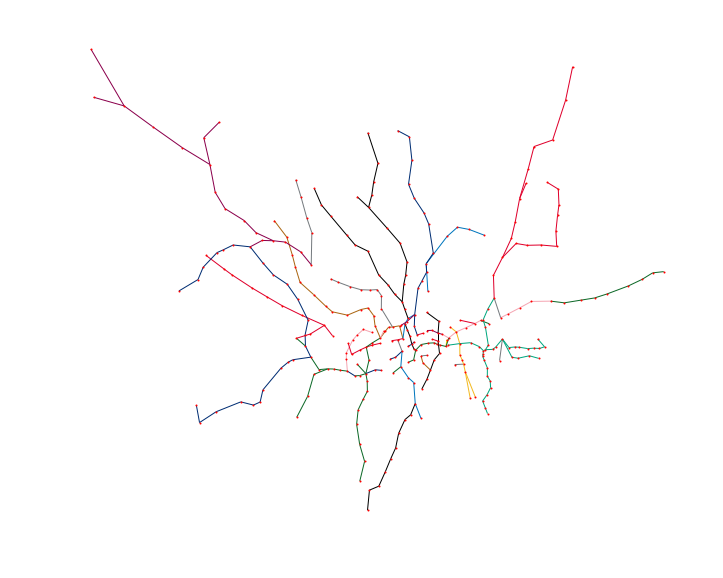

In [8]:
from util import *
from graph import Graph

G, lines = get_subway_graph('csv', Graph)
MST = prim(G, G.nodes()[0])
draw_subway_graph(MST, lines, figsize=(12,10))

In [7]:
import random

def prim(G, origin=None):
    """ Implementación del algoritmo de Prim para obtener el MST de un grafo cualquiera.
    Args:
        G (Graph): El grafo de tipo Graph sobre el que queremos buscar los componentes conexos
    Returns:
        tree: El grafo de tipo Graph que contiene el arbol de expansión mínima.
    """
     #Diccionari on guardo tots els nodes del graf (O(1))
    _nodes = {}
    #Diccionari on guardo el node amb el seu anterior, per a saber el node previ. (O(1))
    _previous = {}
    #Llista on guardo els nodes visitats (O(1))
    _visitats = []
    #Creo l'objecte tree de tipus Graph (O(1))     
    tree = Graph()

    #Defineixo que el node previ de cada node és None, i afegeixo cada node a Tree. (O(n))
    for node in G.nodes():
        
        _previous[node]  = None
        tree.add_node(node,G.node[node].copy())
    #Escullo un node origin a l'atzar d'entre tots els nodes, i defineixo la distància a 0    
    origin = random.choice(G.nodes())
    _nodes[origin] = 0
    
    #Mentre encara quedi algún node al diccionari (O(n))
    while _nodes:
        
        #Busquem el mímin dels nodes (O(1))
        _llista_valors = list(_nodes.values()) #(O(1)) 
        _min_llista_valors = _llista_valors.index(min(_llista_valors)) #(O(1))
        _minim = (list(_nodes.keys())[_min_llista_valors]) #(O(1))
        
        #Amb aquest if controlo que no s'afegeixi un edge entre _minim i none a la primera iteració
        if _previous[_minim] != None:
            #Afegeixo el edge de _minim i el seu previous a Tree (O(n))
            tree.add_edge(_minim,_previous[_minim],G.edge[_minim][_previous[_minim]].copy())
        
#       Bucle que visita tots els nodes veïns de _minim (O(n)
        for vei in G.neighbors(_minim):
        # Si el veí no està la llista de visitats, li assigno el valor de la distancia # (O(n))
            if vei not in _visitats:
                
                _nodes[vei] = G.edge[_minim][vei]['distance']
                G.node[vei]['value'] = _nodes[vei]
                _previous[vei] = _minim
            #Si el _minim no està visitat, l'afegeixo a visitats
        
            if _minim not in _visitats:
                _visitats.append(_minim)
                
        #Elimino el node actual de _nodes 
        del _nodes[_minim] 
    
    print (tree.edges())
    print ("Número de nodos:",(len(tree.nodes())))
    print ("Número de aristas:",(len(tree.edges())))
#     print (tree.node[42])
    
    return tree

In [20]:
prim(G3)

[('A', 'D'), ('A', 'Z'), ('B', 'C'), ('B', 'D'), ('C', 'F'), ('C', 'E')]
Número de nodos: 7
Número de aristas: 6


In [26]:
prim(G2)

[('A', 'D'), ('C', 'F'), ('C', 'B'), ('E', 'F'), ('B', 'D')]
Número de nodos: 6
Número de aristas: 5


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


<div class="alert alert-info">
<center>
  <h1>Comentarios</h1>
  <p>
  En esta sección tenéis que comentar brevemente (1) __cómo habéis realizado la implementación del algoritmo__ así como un (2) __análisis detallado de la complejidad__ del mismo.
  </p>
</center>
</div>

Per tal de realitzar l'implementació de l'algorisme de Prim, m'he basat en el pseudocodi que hi ha tant als apunts com a Internet.

Vaig fer una primera versió del codi (la qual no adjunto, ja que no es necessaria) en la que vaig utilitzar _infinity_, però posteriorment em vaig assabentar de que no es podia fer d'aquesta manera. Per tant, vaig haver de modificar el codi per tal de que no necessites _infinity_. 

El principal canvi en el codi per tal de realitzar la funció sense _infinity_ va ser afegint la llista de vistats, on es troben tots els nodes visitats en les diferents iteracions del codi.

L'algorisme està explicat pas per pas en els comentaris del codi, però basicament escullo com a origin un node aleatori, agafo el mínim i vaig iterant sobre els seus veïns amb els _if's_ necessaris, i afegint el node actual a _tree_, per tal de, finalment, poder tenir a _tree_ el MST.

La complexitat de la meva funció és de O(n^2), degut al _while_ i al _for_ de dins. 



<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
  <p>
  La entrega de esta práctica se realizará a través del __Campus Virtual__. En ella tenéis que incluir únicamente el fichero `.ipynb` sin comprimir con el código debidamente comentado y los comentarios que se os proponen en la anterior sección.
  </p>
  <p>
  El nombre del archivo ha de seguir el formato:
  </p><p style="text-align:center">
  ```
  <apellidos>_<nombre>_EP1.ipynb
  ```
  </p>
</center>
</div>

In [35]:
help(G)

Help on Graph in module graph object:

class Graph(builtins.object)
 |  Clase Graph, que representa un grafo (conjunto de vértices y aristas). La clase representa un grafo no dirigido, por lo tanto, 
 |  las aristas que unen dos vértices son bidireccionales.
 |  Métodos:
 |      -def __init__(self): Constructor de la clase, donde se crea el conjunto vacío de nodos y aristas.
 |      -def node(self)(@property): Atributo que es un conjunto de nodos en un diccionario, donde la key es el nodo y el value son
 |       los atributos del nodo.
 |      -def edge(self)(@property): Atributo que es un conjunto de aristas en un diccionario, donde la key es un nodo y los value
 |       son diccionarios, donde la key es el nodo al que va la arista y el value los atributos de dicha arista.
 |      -def nodes(self): Devuelve una lista con todos los nodos.
 |      -def edges(self): Devuelve una lista con tuplas que representan las aristas (nodo1,nodo2)
 |      -def add_node(self, node, attr_dict=None): 